# Bank Data Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel('Data.xlsx')
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [3]:
cols=list(df.iloc[1,:])
cols

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [4]:
df =pd.read_excel('Data.xlsx',names = cols,skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
# Shape of the dataset
df.shape

(45211, 19)

In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  object 
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(6), 

In [7]:
# Checking Null values
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

### Cleaning of Data

In [8]:
df['job_role'] = df['jobedu'].apply(lambda x:x.split(',')[0])
df['education'] = df['jobedu'].apply(lambda x:x.split(',')[1])
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [9]:
del df['jobedu']
del df['contact']

In [10]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000,2143,married,yes,no,yes,no,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [11]:
df[df['salary'] == '?']

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
3985,3986,46.0,?,300,married,no,no,yes,no,16,"may, 2017",323 sec,3,-1,0,unknown,no,unknown,unknown
4750,4751,38.0,?,124,married,no,no,yes,no,20,"may, 2017",37 sec,13,-1,0,unknown,no,unknown,unknown
6966,6967,57.0,?,327,married,no,no,yes,no,28,"may, 2017",74 sec,2,-1,0,unknown,no,unknown,unknown
7181,7182,29.0,?,209,single,no,no,no,no,29,"may, 2017",346 sec,6,-1,0,unknown,no,unknown,unknown
9002,9003,59.0,?,3940,married,no,no,no,no,5,"jun, 2017",48 sec,2,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42616,42617,65.0,?,300,married,no,no,no,no,12,"jan, 2017",1.75 min,1,-1,0,unknown,no,unknown,unknown
42739,42740,42.0,?,942,single,no,no,no,no,27,"jan, 2017",4.08333333333333 min,1,92,2,success,yes,unknown,unknown
43089,43090,27.0,?,326,single,no,no,no,no,22,"feb, 2017",5.43333333333333 min,1,-1,0,unknown,yes,unknown,unknown
43653,43654,77.0,?,397,married,no,no,no,no,7,"may, 2017",5 min,3,-1,0,unknown,yes,unknown,unknown


In [12]:
df['salary']=df['salary'].replace('?',np.nan,regex=False)

In [13]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000.0,2143,married,yes,no,yes,no,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,yes,no,yes,no,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000.0,2,married,yes,no,yes,yes,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000.0,1506,married,no,no,yes,no,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0.0,1,single,no,no,no,no,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [14]:
df.isnull().sum()

customerid     0
age           20
salary        62
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job_role       0
education      0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job_role      0
education     0
dtype: int64

In [17]:
df.shape

(45049, 19)

In [18]:
df['duration'] = df['duration'].apply(lambda x: float(x.split()[0])/60 if 'sec' in x else float(x.split()[0]))

In [19]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000.0,2143,married,yes,no,yes,no,5,"may, 2017",4.350000,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,yes,no,yes,no,5,"may, 2017",2.516667,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000.0,2,married,yes,no,yes,yes,5,"may, 2017",1.266667,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000.0,1506,married,no,no,yes,no,5,"may, 2017",1.533333,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0.0,1,single,no,no,no,no,5,"may, 2017",3.300000,1,-1,0,unknown,no,unknown,unknown


In [20]:
df['duration']=np.round(df['duration'],2)

In [21]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000.0,2143,married,yes,no,yes,no,5,"may, 2017",4.35,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,yes,no,yes,no,5,"may, 2017",2.52,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000.0,2,married,yes,no,yes,yes,5,"may, 2017",1.27,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000.0,1506,married,no,no,yes,no,5,"may, 2017",1.53,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0.0,1,single,no,no,no,no,5,"may, 2017",3.30,1,-1,0,unknown,no,unknown,unknown


In [22]:
# Columns of dataset
list(df.columns)

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'targeted',
 'default',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'job_role',
 'education']

In [23]:
# Numerical Columns
num_data=[i for i in list(df.columns) if df[i].dtype!='O']
num_data

['customerid',
 'age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [24]:
# Catagorical Columns
cat_data=[j for j in list(df.columns) if df[j].dtype=='O']
cat_data

['marital',
 'targeted',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'response',
 'job_role',
 'education']

In [25]:
# Statistical information about data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,45049.0,22611.059557,13048.811487,1.0,11321.00,22613.0,33912.00,45211.00
age,45049.0,40.927523,10.615914,18.0,33.00,39.0,48.00,95.00
salary,45049.0,57084.241604,32042.589845,0.0,20000.00,60000.0,70000.00,120000.00
balance,45049.0,1361.284490,3042.656384,-8019.0,72.00,448.0,1428.00,102127.00
day,45049.0,15.809230,8.322385,1.0,8.00,16.0,21.00,31.00
duration,45049.0,4.303038,4.292915,0.0,1.72,3.0,5.32,81.97
campaign,45049.0,2.762081,3.093049,1.0,1.00,2.0,3.00,63.00
pdays,45049.0,40.224800,100.103758,-1.0,-1.00,-1.0,-1.00,871.00
previous,45049.0,0.580923,2.306040,0.0,0.00,0.0,0.00,275.00


### Outliers Detection

In [26]:
def outliers(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=data[(data[col]<lb) | (data[col]>ub)][col].shape[0]
    return outliers

In [27]:
for i in num_data:
    print('Outliers in {} : {}'.format(i,outliers(df,i)))

Outliers in customerid : 0
Outliers in age : 484
Outliers in salary : 0
Outliers in balance : 4712
Outliers in day : 0
Outliers in duration : 3224
Outliers in campaign : 3049
Outliers in pdays : 8234
Outliers in previous : 8234


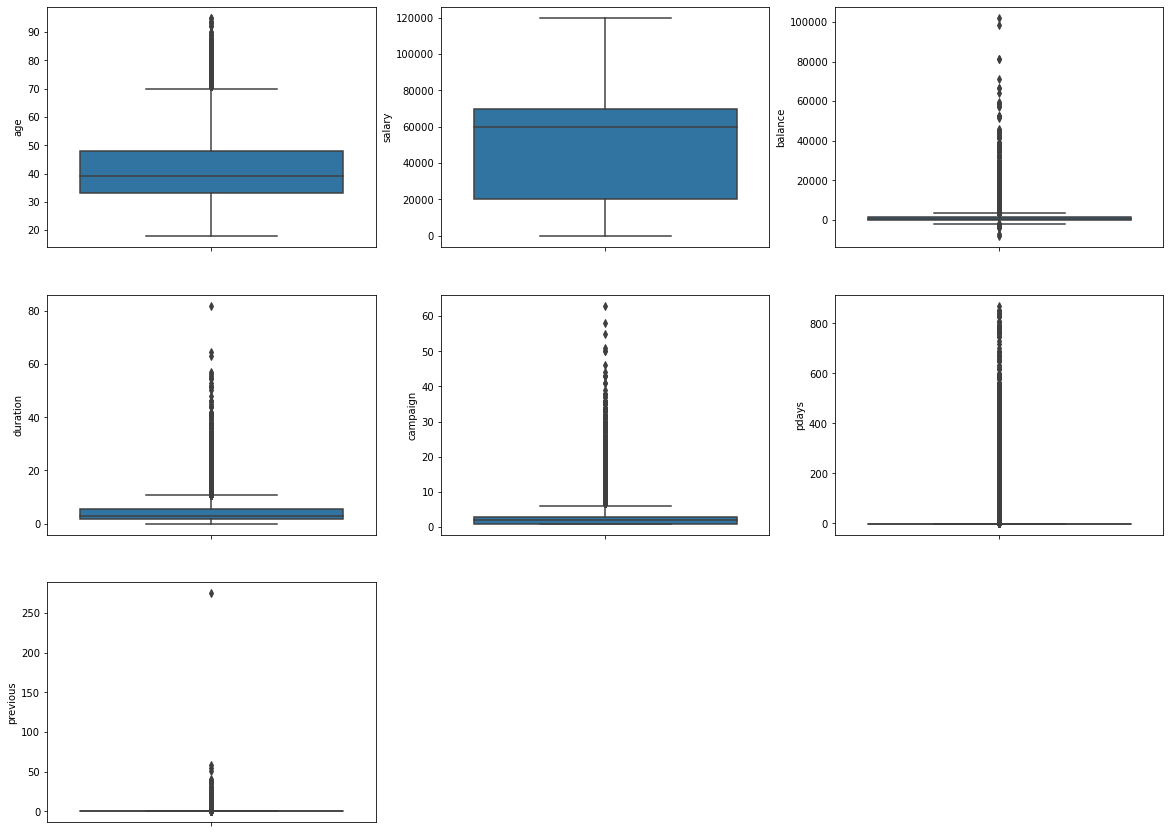

In [28]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(y=df.age)
plt.subplot(3,3,2)
sns.boxplot(y=df.salary)
plt.subplot(3,3,3)
sns.boxplot(y=df.balance)
plt.subplot(3,3,4)
sns.boxplot(y=df.duration)
plt.subplot(3,3,5)
sns.boxplot(y=df.campaign)
plt.subplot(3,3,6)
sns.boxplot(y=df.pdays)
plt.subplot(3,3,7)
sns.boxplot(y=df.previous)
plt.show()

**Observation-->** Above boxplots are showing the outliers present in the columns of the data.

### Skewness

In [29]:
df.skew()

C:\Users\Suvakanta\AppData\Local\Temp\ipykernel_14452\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


customerid    -0.000772
age            0.685002
salary         0.138885
balance        8.386544
day            0.092615
duration       3.143532
campaign       4.904040
pdays          2.608175
previous      41.850616
dtype: float64

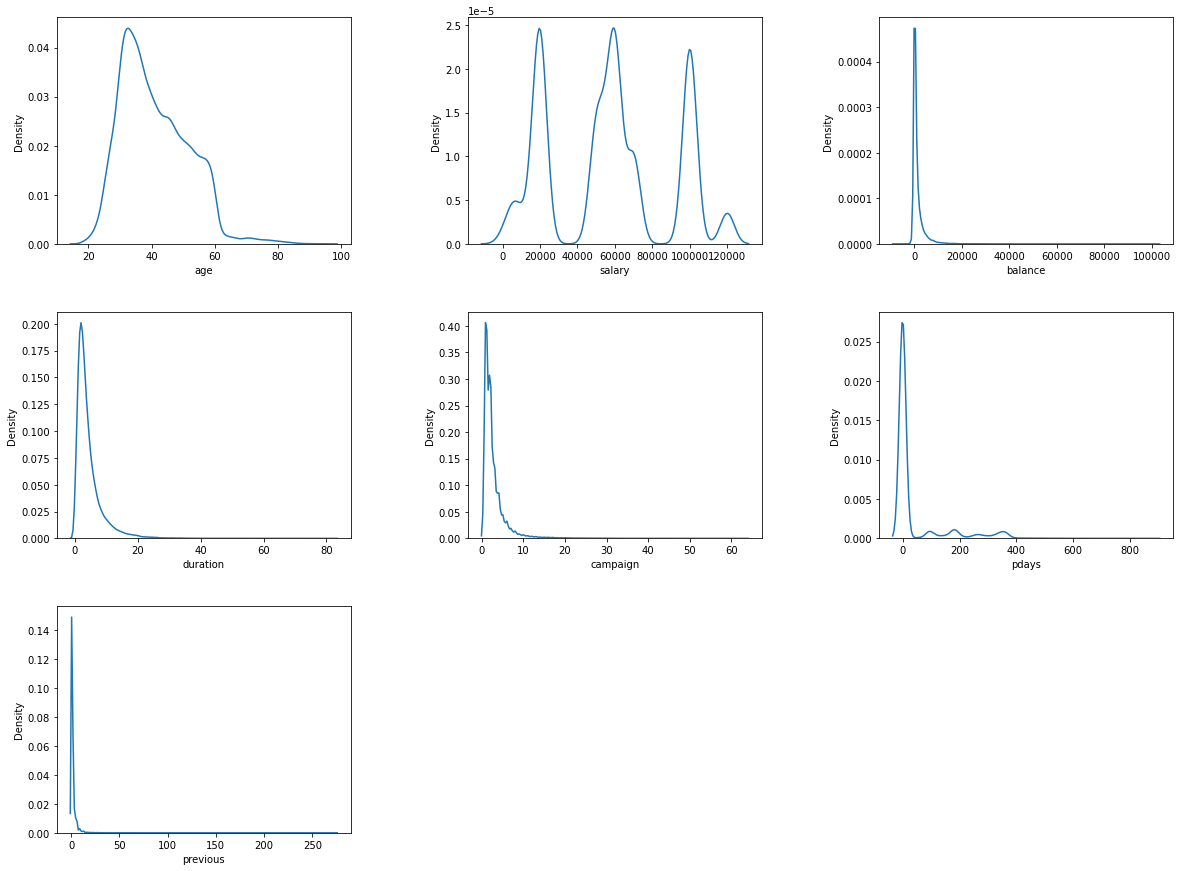

In [30]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.subplot(3,3,1)
sns.kdeplot(df['age'])
plt.subplot(3,3,2)
sns.kdeplot(df['salary'])
plt.subplot(3,3,3)
sns.kdeplot(df['balance'])
plt.subplot(3,3,4)
sns.kdeplot(df['duration'])
plt.subplot(3,3,5)
sns.kdeplot(df['campaign'])
plt.subplot(3,3,6)
sns.kdeplot(df['pdays'])
plt.subplot(3,3,7)
sns.kdeplot(df['previous'])
plt.show()

**Observation-->** Skewness showing the shape of the variable. From the above plots we got to know that all variables are positively skewed and having more outliers.

### Analysis of Numerical Columns

In [31]:
df.age.value_counts()

32.0    2082
31.0    1987
33.0    1970
34.0    1925
35.0    1885
        ... 
93.0       2
90.0       2
95.0       2
88.0       2
94.0       1
Name: age, Length: 77, dtype: int64

In [32]:
pd.cut(df['age'],[0,20,30,50,100]).value_counts(normalize=True)

(30, 50]     0.639859
(50, 100]    0.204466
(20, 30]     0.153522
(0, 20]      0.002153
Name: age, dtype: float64

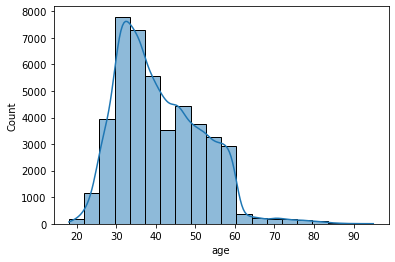

In [33]:
sns.histplot(df.age,bins=20,kde=True)
plt.show()

**Observation-->** There are 63% of customers having age between 30-50. Within this age customers have been targeted more.

In [34]:
df.salary.value_counts()

20000.0     9713
100000.0    9442
60000.0     9153
50000.0     5159
70000.0     4142
55000.0     2258
120000.0    1483
8000.0      1302
16000.0     1234
4000.0       937
0.0          226
Name: salary, dtype: int64

In [35]:
pd.cut(df['salary'],[0,20000,50000,80000,120000]).value_counts(normalize=True)

(50000, 80000]     0.346987
(0, 20000]         0.294179
(80000, 120000]    0.243736
(20000, 50000]     0.115097
Name: salary, dtype: float64

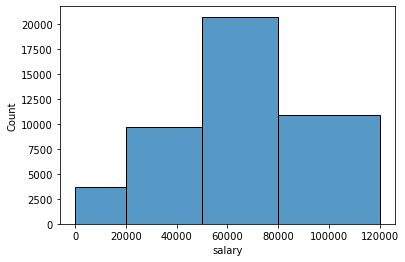

In [36]:
sns.histplot(df.salary,bins=[0,20000,50000,80000,120000])
plt.show()

**Observation-->** 34% of customers are earning between 50000-80000.

In [37]:
df.duration.value_counts(bins=np.arange(0,91,10))

(-0.001, 10.0]    41272
(10.0, 20.0]       3218
(20.0, 30.0]        453
(30.0, 40.0]         77
(40.0, 50.0]         15
(50.0, 60.0]         11
(60.0, 70.0]          2
(80.0, 90.0]          1
(70.0, 80.0]          0
Name: duration, dtype: int64

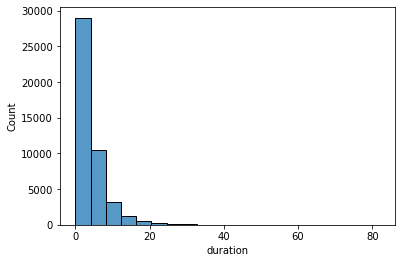

In [38]:
sns.histplot(df.duration,bins=20)
plt.show()

In [39]:
df.campaign.value_counts(bins=[1,10,20,30,40,65])

(0.999, 10.0]    43862
(10.0, 20.0]       945
(20.0, 30.0]       184
(30.0, 40.0]        45
(40.0, 65.0]        13
Name: campaign, dtype: int64

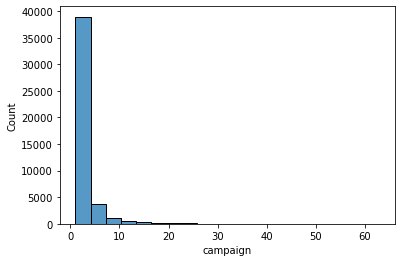

In [40]:
sns.histplot(df.campaign,bins=20)
plt.show()

**Observation-->** Most of the customers have been called between 1 to 10 times. And there are 13 customers which have been called more than 50 times.

## Correlation Test

**Numerical vs Numerical Column**

- Scatter Plot
- Pearson Correlation

**Categorical vs Categorical Column**

- Count Plot
- Crosstab
- Chi Square Test

### Numerical vs Numerical Column

In [41]:
df.corr()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
customerid,1.000000,0.014562,0.039812,0.073283,-0.062170,0.012908,-0.102730,0.437799,0.270954
age,0.014562,1.000000,0.026455,0.097625,-0.008615,-0.004454,0.004669,-0.023638,0.001507
salary,0.039812,0.026455,1.000000,0.056162,0.027739,-0.009857,0.015369,-0.015792,0.014147
balance,0.073283,0.097625,0.056162,1.000000,0.005035,0.021514,-0.014469,0.003856,0.016952
day,-0.062170,-0.008615,0.027739,0.005035,1.000000,-0.030476,0.162394,-0.093275,-0.051814
duration,0.012908,-0.004454,-0.009857,0.021514,-0.030476,1.000000,-0.084095,-0.001972,0.001012
campaign,-0.102730,0.004669,0.015369,-0.014469,0.162394,-0.084095,1.000000,-0.088468,-0.032665
pdays,0.437799,-0.023638,-0.015792,0.003856,-0.093275,-0.001972,-0.088468,1.000000,0.453981
previous,0.270954,0.001507,0.014147,0.016952,-0.051814,0.001012,-0.032665,0.453981,1.000000


### Scatter Plot

In [42]:
def scatter(col1,col2):
    sns.scatterplot(x=df[col1],y=df[col2])
    plt.show()
        
    
widgets.interact(scatter,col1=num_data,col2=num_data)

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

<function __main__.scatter(col1, col2)>

**Observation-->** Scatter plot shows the relationship between two numerical variables. And from this analysis we got to know there is no relation between any numerical columns present in the dataset.

### Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

**Assumptions**

- Observations in each sample are independent and identically distributed.
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

**Interpretation**

H0: the two samples are independent.

H1: there is a dependency between the samples.

In [43]:
def pearson(col1,col2):
    stat, p = stats.pearsonr(df[col1],df[col2])
    print()
    print("p value : " + str(p))
    print()
    if p > 0.05:
        print('Both are Independent (H0 holds true)')
    else:
        print('Both are Dependent (Reject H0)')

widgets.interact(pearson,col1=num_data,col2=num_data)

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

<function __main__.pearson(col1, col2)>

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

**Interpretation**

H0: the two samples are independent.

H1: there is a dependency between the samples.

#### Numerical vs Catagorical Column

In [44]:
def chi_test(col1,col2):
    ct = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    alpha = 0.05
    print()
    print("p value : " + str(p)) 
    print()
    if p <= alpha:
        print('{} and {} both are Dependent (Reject H0)'.format(col1,col2))
    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))

widgets.interact(chi_test,col1=num_data,col2=cat_data)

interactive(children=(Dropdown(description='col1', options=('customerid', 'age', 'salary', 'balance', 'day', '…

<function __main__.chi_test(col1, col2)>

#### Categorical vs Categorical Column

In [45]:
def chi_test(col1,col2):
    ct = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    alpha = 0.05
    print()
    print("p value : " + str(p)) 
    print()
    if p <= alpha:
        print('{} and {} both are Dependent (Reject H0)'.format(col1,col2))
    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))

widgets.interact(chi_test,col1=cat_data,col2=cat_data)

interactive(children=(Dropdown(description='col1', options=('marital', 'targeted', 'default', 'housing', 'loan…

<function __main__.chi_test(col1, col2)>

### Univariate Analysis (Crosstab & Count Plot)

In [46]:
np.round((pd.crosstab(df.marital,df.targeted,margins=True)/len(df))*100,2)

targeted,no,yes,All
marital,,,
divorced,3.63,7.90,11.52
married,2.47,57.71,60.18
single,11.74,16.56,28.30
All,17.84,82.16,100.00


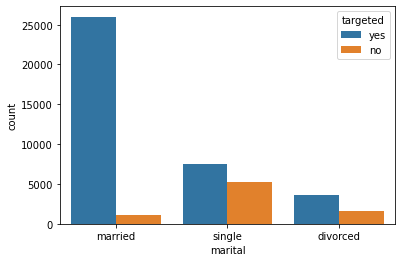

In [47]:
sns.countplot(x=df.marital,hue=df.targeted)
plt.show()

**Observation-->** Figure showing that married customers have been targeted more that single and divorced

In [48]:
np.round((pd.crosstab(df.marital,df.response,margins=True)/len(df))*100,2)

response,no,yes,All
marital,,,
divorced,10.15,1.37,11.52
married,54.09,6.09,60.18
single,24.07,4.23,28.30
All,88.31,11.69,100.00


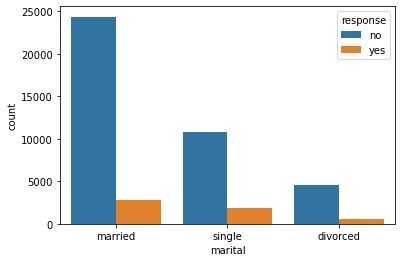

In [49]:
sns.countplot(x=df.marital,hue=df.response)
plt.show()

**Observation-->** There are few responses we are getting from the plots of each catagory

In [50]:
np.round((pd.crosstab(df.marital,df.housing,margins=True)/len(df))*100,2)

housing,no,yes,All
marital,,,
divorced,5.09,6.44,11.52
married,26.26,33.92,60.18
single,13.01,15.29,28.30
All,44.36,55.64,100.00


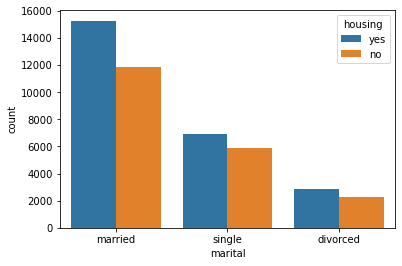

In [51]:
sns.countplot(x=df.marital,hue=df.housing)
plt.show()

**Observation-->** Housing loan has been taken more in case of married customers.

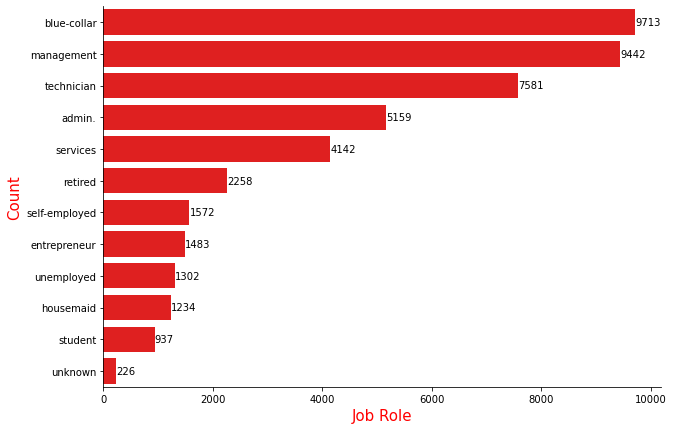

In [52]:
plt.figure(figsize=(10, 7))
p=sns.countplot(y=df.job_role,color='r',order = df['job_role'].value_counts().index)
p.set_xlabel("Job Role", fontsize = 15,color='r')
p.set_ylabel("Count", fontsize = 15,color='r')
plt.xticks(size=10)
plt.yticks(size=10)
p.bar_label(p.containers[0],size=10)
sns.despine() 
plt.show()

**Observation-->** Figure showing the job roles who have been targeted more for the campaign.

In [53]:
s=np.round((pd.crosstab(df.job_role,df.targeted)/len(df))*100,2)
p=s.sort_values(by=['yes'],ascending=False)
p

targeted,no,yes
job_role,,
blue-collar,1.20,20.36
technician,2.91,13.92
management,8.29,12.67
admin.,1.11,10.34
services,0.58,8.62
retired,0.51,4.50
entrepreneur,0.68,2.61
self-employed,0.93,2.56
housemaid,0.23,2.51


**Observation-->** Above dataframe showing the percentage of targeted customers with respect to their job roles

In [54]:
s=np.round((pd.crosstab(df.job_role,df.response)/len(df))*100,2)
p=s.sort_values(by=['yes'],ascending=False)
p

response,no,yes
job_role,,
management,18.08,2.88
technician,14.97,1.86
blue-collar,19.99,1.57
admin.,10.05,1.40
retired,3.87,1.14
services,8.38,0.82
student,1.48,0.60
unemployed,2.44,0.45
self-employed,3.08,0.41


**Observation-->** Above dataframe showing the percentage of responses that bank got with respect to their job roles. It is seen that very less people are interested with the campaign.

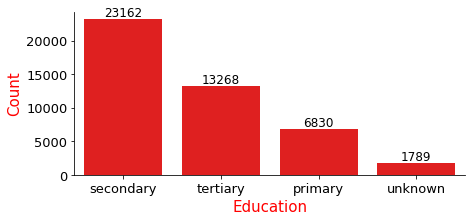

In [55]:
plt.figure(figsize=(7, 3))
p=sns.countplot(x=df.education,color='r',order = df['education'].value_counts().index)
p.set_xlabel("Education", fontsize = 15,color='r')
p.set_ylabel("Count", fontsize = 15,color='r')
plt.xticks(size=13)
plt.yticks(size=13)
p.bar_label(p.containers[0],size=12)
sns.despine() 
plt.show()

In [56]:
s=np.round((pd.crosstab(df.education,df.targeted)/len(df))*100,2)
p=s.sort_values(by=['yes'],ascending=False)
p

targeted,no,yes
education,,
secondary,0.00,51.42
tertiary,13.86,15.59
primary,0.00,15.16
unknown,3.97,0.00


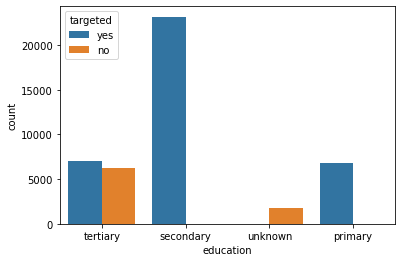

In [57]:
sns.countplot(x=df.education,hue=df.targeted)
plt.show()

**Observation-->** Customers having secondary education have been targeted more than other education.

In [58]:
s=np.round((pd.crosstab(df.education,df.response)/len(df))*100,2)
p=s.sort_values(by=['yes'],ascending=False)
p

response,no,yes
education,,
secondary,45.98,5.43
tertiary,25.03,4.42
primary,13.85,1.31
unknown,3.44,0.53


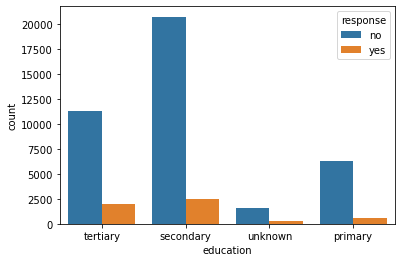

In [59]:
sns.countplot(x=df.education,hue=df.response)
plt.show()

**Observation-->** Plot showing that bank is not getting enough reponses for its campaign.

In [60]:
df['month'] = df['month'].apply(lambda x:x.split(',')[0])
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,job_role,education
0,1,58.0,100000.0,2143,married,yes,no,yes,no,5,may,4.35,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000.0,29,single,yes,no,yes,no,5,may,2.52,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000.0,2,married,yes,no,yes,yes,5,may,1.27,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000.0,1506,married,no,no,yes,no,5,may,1.53,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0.0,1,single,no,no,no,no,5,may,3.30,1,-1,0,unknown,no,unknown,unknown


In [61]:
df['month'].value_counts()

may    13726
jul     6882
aug     6218
jun     5307
nov     3959
apr     2923
feb     2642
jan     1396
oct      733
sep      574
mar      476
dec      213
Name: month, dtype: int64

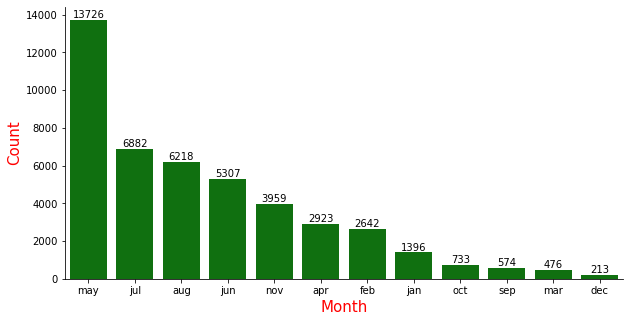

In [62]:
plt.figure(figsize=(10, 5))
p=sns.countplot(x = 'month',
              data = df,
              order = df['month'].value_counts().index,color='g')

p.set_xlabel("Month", fontsize = 15,color='r')
p.set_ylabel("Count", fontsize = 15,color='r')
plt.xticks(size=10)
plt.yticks(size=10)
p.bar_label(p.containers[0],size=10)
sns.despine()
plt.show()

**Observation-->** Above plot showing that how many calls they have made in each month. And in the month of May it is highest.

In [63]:
np.round(pd.DataFrame(df.poutcome.value_counts(normalize=True))*100,2)

,poutcome
unknown,81.73
failure,10.85
other,4.08
success,3.34


**Observation-->** Previous campaign outcomes. It is clearly showing that the success rate is too low i.e only 3%.

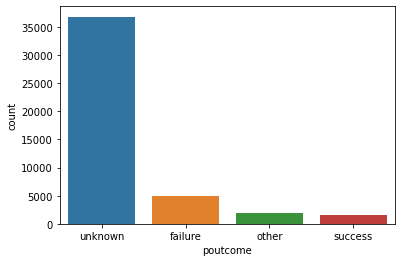

In [64]:
sns.countplot(x=df.poutcome)
plt.show()

In [65]:
np.round((pd.DataFrame(df['response'].value_counts())/len(df))*100,2)

,response
no,88.31
yes,11.69


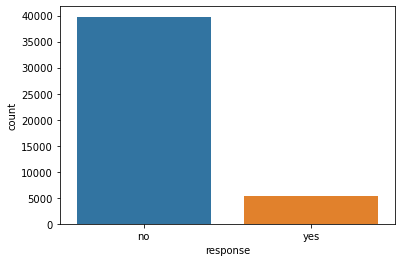

In [66]:
sns.countplot(x=df.response)
plt.show()

**Observation-->** It shows the outcome is very low that is only 11% they have gotten.

In [67]:
np.round((pd.DataFrame(df['targeted'].value_counts())/len(df))*100,2)

,targeted
yes,82.16
no,17.84


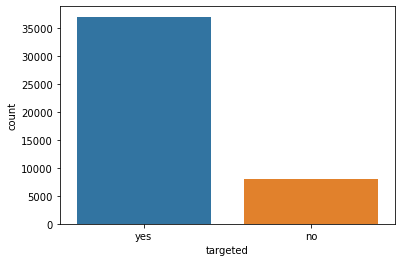

In [68]:
sns.countplot(x=df.targeted)
plt.show()

**Observation-->** There are 82% of customers targeted which were targeted previous campaign and 18% are new customers.

In [69]:
np.round((pd.crosstab(df.targeted,df.response,margins=True)/len(df))*100,2)

response,no,yes,All
targeted,,,
no,14.91,2.93,17.84
yes,73.40,8.76,82.16
All,88.31,11.69,100.00


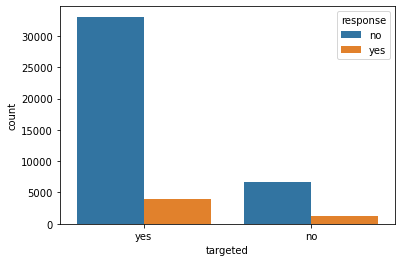

In [70]:
sns.countplot(x=df.targeted,hue=df.response)
plt.show()

**Observation-->** From the above table & plot it is showing that from the 82% of the previously targeted customers only 9% has been responded *YES* that seems maximum customers are not interested to the campaign.

## Normality Test

**Probability plot to check the normality of the column**

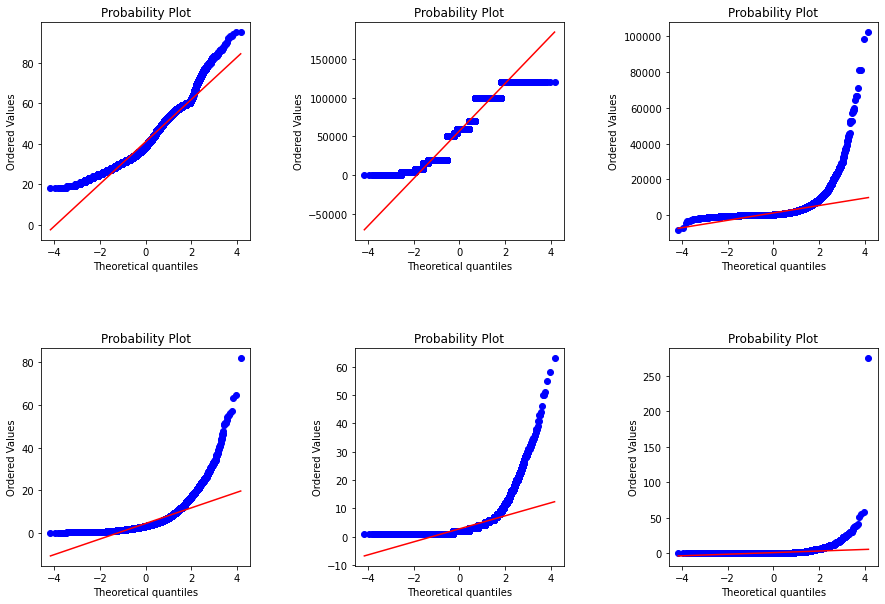

In [71]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2, 3, 1)
stats.probplot(df['age'], dist="norm", plot=plt)

plt.subplot(2, 3, 2)
stats.probplot(df['salary'], dist="norm", plot=plt)

plt.subplot(2, 3, 3)
stats.probplot(df['balance'], dist="norm", plot=plt)

plt.subplot(2, 3, 4)
stats.probplot(df['duration'], dist="norm", plot=plt)

plt.subplot(2, 3, 5)
stats.probplot(df['campaign'], dist="norm", plot=plt)

plt.subplot(2, 3, 6)
stats.probplot(df['previous'], dist="norm", plot=plt)

plt.show()

**Observation-->**  From the above test we got to know that there is not a single column which follows the Normal Distribution.

### Shapiro Wilk Test for Normality

**Assumptions**

Observations in each sample are independent and identically distributed

**Interpretation**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

**Cons**

Cannot deal with more than 5000 data points

In [72]:
def shapiro_wilk(data):
    stat, p = stats.shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

In [73]:
shapiro_wilk(df['age'])

stat=0.961, p=0.000
Probably not Gaussian


S:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Kolmogorov-Smirnov Test for Normality

**Assumptions**

Observations in each sample are independent and identically distributed

**Interpretation**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [74]:
def kolmogorov_smirnov(data,col):
    print("{}:".format(col))
    stat,p=stats.kstest(data[col], 'norm')
    print('stat=%.3f, p=%.3f' % (stat, p))
   
    if p > 0.05:
        return ('Probably Gaussian')
    else:
        return ('Probably not Gaussian')
   

In [75]:
for i in num_data:
    print(kolmogorov_smirnov(df,i))
    print()

customerid:
stat=1.000, p=0.000
Probably not Gaussian

age:
stat=1.000, p=0.000
Probably not Gaussian

salary:
stat=0.995, p=0.000
Probably not Gaussian

balance:
stat=0.830, p=0.000
Probably not Gaussian

day:
stat=0.970, p=0.000
Probably not Gaussian

duration:
stat=0.747, p=0.000
Probably not Gaussian

campaign:
stat=0.841, p=0.000
Probably not Gaussian

pdays:
stat=0.659, p=0.000
Probably not Gaussian

previous:
stat=0.500, p=0.000
Probably not Gaussian



**Observation-->**

- From the output we can see that the test statistic and the corresponding p-value. Since the p-value is less than 0.05 in all   the numerical columns, we **reject the null hypothesis**. We have sufficient evidence to say that the sample data does not come     from a normal distribution.

## Central Limit Theorem

- The mean of sample means is equal to population mean.
- The histogtam/distribution of sample means looks like Normal Distribution. (if sample size is high)

In [76]:
def clt(col):           
    pop_mean = df[col].mean()
    
    sample_means = []
    for i in range(10001):
        sample_means.append(df[col].sample(1000).mean())
    print('population mean for {} is {}:'.format(col,pop_mean))        
    print('mean of sample means for {} is {}:'.format(col,np.mean(sample_means)))
    sns.histplot(sample_means);

widgets.interact(clt,col=num_data)

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'day', 'd…

<function __main__.clt(col)>

**Observation-->** All columns in the dataset are following the Central Limit Theorem.

### Bivariate Analysis

In [77]:
s=pd.pivot_table(data=df,index='job_role',columns='education',values='salary',aggfunc='count',margins=True)
sort=s.sort_values(by='All',ascending=False)
sort

education,primary,secondary,tertiary,unknown,All
job_role,,,,,
All,6830,23162,13268,1789,45049
blue-collar,3746,5365,149,453,9713
management,294,1119,7788,241,9442
technician,158,5219,1962,242,7581
admin.,209,4210,570,170,5159
services,343,3450,200,149,4142
retired,793,982,365,118,2258
self-employed,130,576,827,39,1572
entrepreneur,183,540,685,75,1483


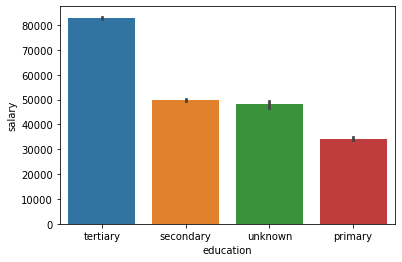

In [78]:
sns.barplot(x=df.education,y=df.salary)
plt.show()

**Observation-->** Figure shows the education with respect to salary. Customers belong to tertiary education background are getting more salary than others.

In [79]:
d=df[['job_role','salary']]
d.sort_values('salary',ascending=False)

,job_role,salary
45210,entrepreneur,120000.0
4055,entrepreneur,120000.0
28482,entrepreneur,120000.0
28449,entrepreneur,120000.0
28432,entrepreneur,120000.0
...,...,...
8965,unknown,0.0
44742,unknown,0.0
23158,unknown,0.0
30715,unknown,0.0


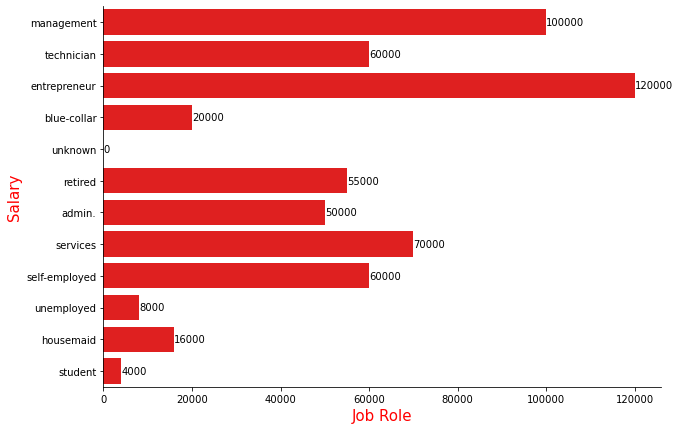

In [80]:
plt.figure(figsize=(10, 7))
p=sns.barplot(x='salary',
            y='job_role', data=d,color='r')
p.set_xlabel("Job Role", fontsize = 15,color='r')
p.set_ylabel("Salary", fontsize = 15,color='r')
plt.xticks(size=10)
plt.yticks(size=10)
p.bar_label(p.containers[0],size=10)
sns.despine() 
plt.show()

**Observation-->** Figure shows the job role with respect to salary. Among the roles Enterpreneurs are making more money than others. On the other hand Students are making less which is obvious.

In [81]:
def age(col):
    return df.groupby(df[col])['age'].agg({'count','min','mean','max'})

widgets.interact(age,col=list(df.columns))

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'marital'…

<function __main__.age(col)>

**Observation-->** Age wise analysis with every column of the dataset.

In [82]:
def duration(col):
    return df.groupby(df[col])['duration'].agg({'count','min','mean','max'})

widgets.interact(duration,col=list(df.columns))

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'marital'…

<function __main__.duration(col)>

**Observation-->** Duration wise analysis with every column of the dataset.

In [83]:
def response(col):
    return df.groupby('response')[col].agg({'mean','median'})

widgets.interact(response,col=num_data)

interactive(children=(Dropdown(description='col', options=('customerid', 'age', 'salary', 'balance', 'day', 'd…

<function __main__.response(col)>

**Observation-->** Response wise analysis

## Probability

In [97]:
# probability of education with response feature --->

ed=pd.crosstab(df.education,df.response,margins=True)/len(df)
ed

response,no,yes,All
education,,,
primary,0.138516,0.013097,0.151613
secondary,0.459833,0.054319,0.514151
tertiary,0.250350,0.044174,0.294524
unknown,0.034407,0.005305,0.039712
All,0.883105,0.116895,1.000000


### Marginal Probabilities:

In [85]:
def marginal(data1,data2):
    print()
    print('Probability({}) : {}'.format(data1,ed['All'][data1]*100))
    print()
    print('Probability({}) : {}'.format(data2,ed[data2]['All']*100))

widgets.interact(marginal,data1=['primary','secondary','tertiary','unknown'],data2=['no','yes'])

interactive(children=(Dropdown(description='data1', options=('primary', 'secondary', 'tertiary', 'unknown'), v…

<function __main__.marginal(data1, data2)>

### Joint Probabilities:

In [86]:
def joint(data1,data2):
    print()
    print('Probability({} and {}) : {} '.format(data1,data2,ed[data1][data2]*100))

widgets.interact(joint,data1=['no','yes'],data2=['primary','secondary','tertiary','unknown'])

interactive(children=(Dropdown(description='data1', options=('no', 'yes'), value='no'), Dropdown(description='…

<function __main__.joint(data1, data2)>

### Conditional probabilities:

In [87]:
def conditional(data1,data2):
    print()
    print('Probability({} | {}) : {} '.format(data1,data2,ed[data1][data2]/ed['All'][data2]*100))

widgets.interact(conditional,data1=['no','yes'],data2=['primary','secondary','tertiary','unknown'])

interactive(children=(Dropdown(description='data1', options=('no', 'yes'), value='no'), Dropdown(description='…

<function __main__.conditional(data1, data2)>

In [88]:
# probability of job_role with response feature --->

job=pd.crosstab(df.job_role,df.response,margins=True)/len(df)
job

response,no,yes,All
job_role,,,
admin.,0.100535,0.013985,0.114520
blue-collar,0.199893,0.015716,0.215610
entrepreneur,0.030189,0.002730,0.032920
housemaid,0.025017,0.002375,0.027392
management,0.180759,0.028835,0.209594
retired,0.038691,0.011432,0.050123
self-employed,0.030789,0.004107,0.034895
services,0.083775,0.008169,0.091944
student,0.014828,0.005971,0.020800


In [89]:
d=['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services',
  'student','technician','unemployed','unknown']

### Marginal Probabilities:

In [90]:
def marginal(data1,data2):
    print()
    print('Probability({}) : {}'.format(data1,job['All'][data1]*100))
    print()
    print('Probability({}) : {}'.format(data2,job[data2]['All']*100))

widgets.interact(marginal,data1=d,data2=['no','yes'])

interactive(children=(Dropdown(description='data1', options=('admin.', 'blue-collar', 'entrepreneur', 'housema…

<function __main__.marginal(data1, data2)>

### Joint Probabilities:

In [91]:
def joint(data1,data2):
    print()
    print('Probability({} and {}) : {} '.format(data1,data2,job[data1][data2]*100))

widgets.interact(joint,data1=['no','yes'],data2=d)

interactive(children=(Dropdown(description='data1', options=('no', 'yes'), value='no'), Dropdown(description='…

<function __main__.joint(data1, data2)>

### Conditional probabilities:

In [92]:
def conditional(data1,data2):
    print()
    print('Probability({} | {}) : {} '.format(data1,data2,job[data1][data2]/job['All'][data2]*100))

widgets.interact(conditional,data1=['no','yes'],data2=d)

interactive(children=(Dropdown(description='data1', options=('no', 'yes'), value='no'), Dropdown(description='…

<function __main__.conditional(data1, data2)>

## Transformation to Normal Distribution

In [93]:
def plotvariable(data,variable):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    data[variable].hist(bins=30)
    
    ## QQ Plot
    plt.subplot(1,2,2)
    stats.probplot(data[variable],dist='norm',plot=plt)

### Log Transformation

Should only be applicable to the variable if the values are > 0

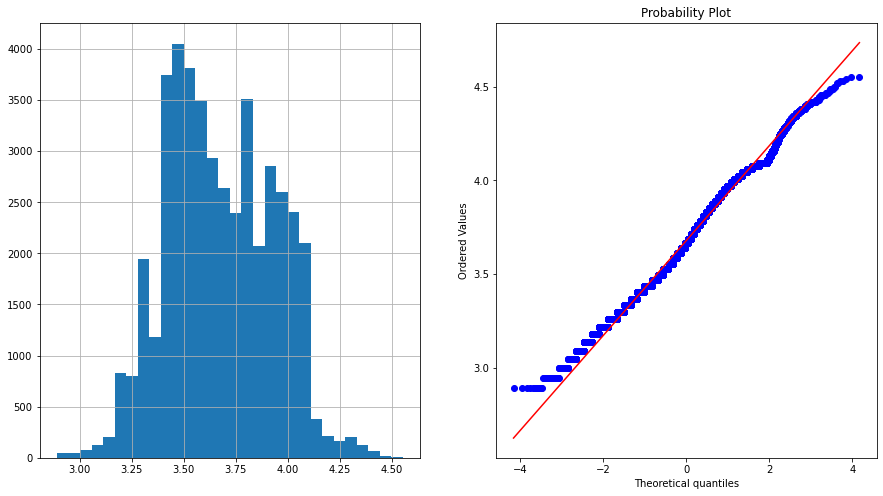

In [94]:
df["age_log"] = np.log(df["age"])
plotvariable(df,'age_log')

### Exponential Transformation

In [95]:
def expo(col1,col2):
    df[col1] = df[col2] ** (1/3)
    plotvariable(df,col1)

widgets.interact(expo,col1=['age1','salary1','balance1','day1','duration1','campaign1','pday,''previous1'],col2=num_data)

interactive(children=(Dropdown(description='col1', options=('age1', 'salary1', 'balance1', 'day1', 'duration1'…

<function __main__.expo(col1, col2)>